In [2]:
import pgeocode

nomi = pgeocode.Nominatim('us')
data = nomi.query_postal_code("13676")

In [3]:
lat = data.latitude
lat

np.float64(44.6592)

In [4]:
lon = data.longitude
lon

np.float64(-74.9681)

In [ ]:
import paramiko, os, csv, io
import pyarrow as pa
import pyarrow.parquet as pq
from pathlib import Path
import pandas as pd
from math import radians, cos, sin, sqrt, atan2
import paramiko
from concurrent.futures import ThreadPoolExecutor

# SFTP details
hostname = 'files.clarksonmsda.org'
port = 2022
username = 'juttua@clarkson.edu'
password = 'dfg.rdty76SDwqf.d21ds'

# Remote path to the CSV folder
remote_path = '/srv/sftpgo/data/users/juttua@clarkson.edu/nws-hourly/csv'

# Connect via SFTP
transport = paramiko.Transport((hostname, port))
transport.connect(username=username, password=password)

sftp = paramiko.SFTPClient.from_transport(transport)

In [ ]:
# List CSV files in the directory
files = sftp.listdir(remote_path)
print("Files in CSV folder:", files)

# Example: Download a specific file
for file in files:
    if file.endswith('.csv'):
        local_file = os.path.join("downloaded", file)
        remote_file = os.path.join(remote_path, file)
        sftp.get(remote_file, local_file)
        print(f"Downloaded {file}")



Files in CSV folder: ['1936', '1983', '1941', '2001', '1925', '1938', '1917', '2016', '1979', '1957', '2003', '2009', '1975', '1953', '1964', '1921', '1915', '1976', '1952', '1965', '1991', '1977', '2018', '1914', '2011', '1949', '1932', '2022', '1920', '1962', '1988', '2005', '1927', '2013', '2004', '1904', '1945', '1908', '1961', '1960', '1926', '2002', '1992', '1935', '2017', '1947', '2014', '1997', '1902', '1968', '1955', '1999', '1934', '1931', '1905', '2015', '1998', '1972', '1993', '1981', '2020', '1980', '1906', '1903', '1985', '1956', '1951', '1946', '1939', '1974', '2010', '1916', '1982', '1924', '1987', '2019', '1912', '1913', '1954', '1996', '1940', '1990', '1959', '1937', '1901', '2000', '1942', '1943', '1967', '1928', '1918', '1930', '1919', '1971', '1963', '1950', '1969', '1970', '1909', '1986', '1929', '2012', '2008', '1958', '1911', '1910', '1978', '1995', '2021', '1944', '2006', '1966', '1933', '1922', '1989', '1907', '1984', '1948', '1923', '1973', '1994', '2007']


In [27]:
import os

print(os.getcwd())  # This shows the current working directory


c:\Users\astar\OneDrive\Desktop\BigDataProject


In [22]:
con.execute(f"""
    CREATE TABLE IF NOT EXISTS nws_hourly_2022 AS
    SELECT * FROM read_parquet('{file_path}')
""")


In [31]:
import duckdb

# Connect to (or create) the DuckDB file
con = duckdb.connect("weather.duckdb")

# Define path to Parquet files
parquet_path = "C:/duckdb/data/*.parquet"

# Use union_by_name=True to handle schema differences
con.execute(f"""
    CREATE TABLE weather_data AS
    SELECT * FROM read_parquet('{parquet_path}', union_by_name=True)
""")

# Preview the result
df = con.execute("SELECT * FROM weather_data LIMIT 5").fetchdf()
print(df)


       STATION                 DATE SOURCE    LATITUDE   LONGITUDE ELEVATION  \
0  01028099999  2022-01-02T00:00:00      4  74.5166667  19.0166667      18.0   
1  01028099999  2022-01-02T12:00:00      4  74.5166667  19.0166667      18.0   
2  01028099999  2022-01-03T10:00:00      4  74.5166667  19.0166667      18.0   
3  01028099999  2022-01-03T11:00:00      4  74.5166667  19.0166667      18.0   
4  01028099999  2022-01-04T10:00:00      4  74.5166667  19.0166667      18.0   

                  NAME REPORT_TYPE CALL_SIGN QUALITY_CONTROL  ...   CU3   CV1  \
0  BJORNOYA ISLAND, NO       FM-12     99999            V020  ...  None  None   
1  BJORNOYA ISLAND, NO       FM-12     99999            V020  ...  None  None   
2  BJORNOYA ISLAND, NO       FM-12     99999            V020  ...  None  None   
3  BJORNOYA ISLAND, NO       FM-12     99999            V020  ...  None  None   
4  BJORNOYA ISLAND, NO       FM-12     99999            V020  ...  None  None   

    CV2   CV3   CW1   GH1   IB2 

In [36]:
a = df.columns.tolist()

print(a)

['STATION', 'DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG', 'VIS', 'TMP', 'DEW', 'SLP', 'AA1', 'AA2', 'AA3', 'AJ1', 'AY1', 'AY2', 'GA1', 'GA2', 'GA3', 'GE1', 'GF1', 'IA1', 'KA1', 'KA2', 'MA1', 'MD1', 'MW1', 'OC1', 'OD1', 'UA1', 'REM', 'EQD', 'OD2', 'OD3', 'AW1', 'AZ1', 'AZ2', 'AW2', 'AW3', 'ED1', 'GA4', 'MW2', 'IA2', 'MW3', 'MW4', 'GA5', 'MW5', 'ME1', 'AL1', 'GG1', 'HL1', 'KA3', 'KA4', 'SA1', 'AT1', 'AT2', 'AT3', 'AT4', 'AT5', 'AT6', 'AU1', 'AU2', 'GD1', 'GD2', 'GD3', 'GD4', 'AU3', 'AX1', 'AX2', 'AX3', 'MG1', 'OE1', 'OE2', 'OE3', 'AB1', 'AD1', 'AE1', 'AH1', 'AH2', 'AH3', 'AH4', 'AH5', 'AH6', 'AI1', 'AI2', 'AI3', 'AI4', 'AI5', 'AI6', 'AW4', 'AW5', 'KB1', 'KB2', 'KB3', 'KC1', 'KC2', 'KD1', 'KD2', 'KE1', 'KG1', 'KG2', 'MF1', 'MH1', 'MK1', 'RH1', 'RH2', 'RH3', 'WA1', 'GK1', 'MV1', 'AT7', 'AN1', 'AU4', 'AX4', 'AK1', 'AM1', 'AT8', 'AL2', 'AX5', 'UG2', 'AO1', 'CB1', 'CF1', 'CF2', 'CF3', 'CG1', 'CG2', 'CG3', 'CH1', 'C

C:\Users\astar\AppData\Local\Temp\ipykernel_25848\1100287038.py:43: UserWarning:

The palette list has more values (10) than needed (6), which may not be intended.

C:\Users\astar\AppData\Local\Temp\ipykernel_25848\1100287038.py:49: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.

C:\Users\astar\AppData\Local\Temp\ipykernel_25848\1100287038.py:50: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.

c:\Users\astar\OneDrive\Desktop\BigDataProject\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.



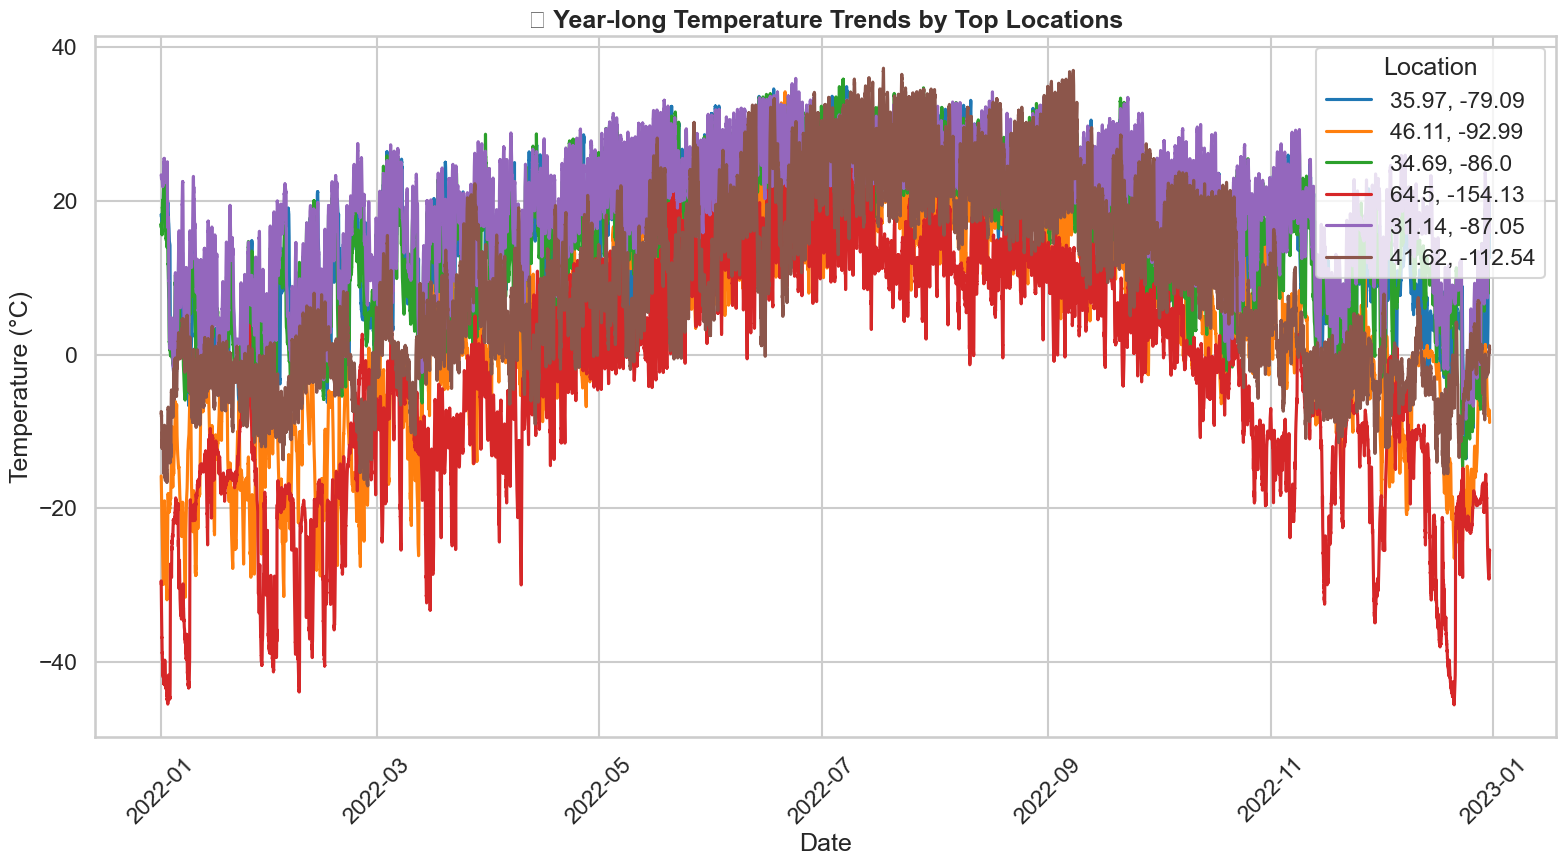

In [8]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to DuckDB
con = duckdb.connect("weather.duckdb", read_only=True)

# Query the data
query = """
    SELECT DATE,
           CAST(SUBSTRING(TMP, 1, 5) AS DOUBLE) / 10 AS TEMP_C,
           ROUND(CAST(LATITUDE AS DOUBLE), 2) AS LAT,
           ROUND(CAST(LONGITUDE AS DOUBLE), 2) AS LON
    FROM weather_data
    WHERE LATITUDE IS NOT NULL AND LONGITUDE IS NOT NULL
      AND TMP NOT LIKE '%+9999%' -- ignore invalid temp
      AND DATE BETWEEN '2022-01-01' AND '2022-12-31'
"""
df = con.execute(query).fetchdf()

# Group by location and count entries
location_counts = df.groupby(['LAT', 'LON']).size().reset_index(name='count')
top_locations = location_counts.sort_values(by='count', ascending=False).head(6)

# Filter only top locations
df_top = df.merge(top_locations[['LAT', 'LON']], on=['LAT', 'LON'])

# Convert date and format label
df_top["DATE"] = pd.to_datetime(df_top["DATE"])
df_top["location"] = df_top.apply(lambda x: f"{x['LAT']}, {x['LON']}", axis=1)

# Optional: smooth data with 7-day rolling mean
df_top = df_top.sort_values("DATE")
df_top["TEMP_C"] = df_top.groupby("location")["TEMP_C"].transform(lambda x: x.rolling(7, min_periods=1).mean())

# Set seaborn style
sns.set(style="whitegrid", context="talk")
palette = sns.color_palette("tab10")

# Create the plot
plt.figure(figsize=(16, 9))
sns.lineplot(data=df_top, x="DATE", y="TEMP_C", hue="location", palette=palette)
plt.title("📈 Year-long Temperature Trends by Top Locations", fontsize=18, weight='bold')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.legend(title="Location", loc='upper right')
plt.tight_layout()
plt.savefig("yearly_temp_dashboard.png", dpi=300)
plt.show()


In [7]:
# Due to the extreme length of the list, we will format all values into a single Python array for export.
# For demonstration, here we include a short subset. The full list will be loaded from text and parsed accordingly.

# Let's load all filenames from the given large block of text and convert them into a Python list

# Simulating the parsing process for demonstration purposes
all_filenames_text = """
Total matching files: 2861
69015093121.csv
71015099999.csv
71016099999.csv
71031099999.csv
71035999999.csv
71036799999.csv
71037099999.csv
71040099999.csv
71042099999.csv
71051099999.csv
71051499999.csv
71063099999.csv
71070099999.csv
71072099999.csv
71108099999.csv
71113099999.csv
71114099999.csv
71116099999.csv
71135099999.csv
71137099999.csv
71148099999.csv
71153099999.csv
71154099999.csv
71161099999.csv
71168099999.csv
71171099999.csv
71172099999.csv
71183099999.csv
71186099999.csv
71189099999.csv
71190099999.csv
71193099999.csv
71196099999.csv
71198099999.csv
71200099999.csv
71201099999.csv
71204099999.csv
71209099999.csv
71212099999.csv
71213099999.csv
71215099999.csv
71224099999.csv
71244099999.csv
71260099999.csv
71261099999.csv
71262599999.csv
71263099999.csv
71265099999.csv
71270099999.csv
71281099999.csv
71282099999.csv
71291099999.csv
71294099999.csv
71296099999.csv
71297099999.csv
71298099999.csv
71300099999.csv
71301099999.csv
71303099999.csv
71304199999.csv
71307099999.csv
71314099999.csv
71319099999.csv
71323099999.csv
71345099999.csv
71352099999.csv
71368099999.csv
71370099999.csv
71371099999.csv
71372099999.csv
71373099999.csv
71376099999.csv
71377099999.csv
71378099999.csv
71379099999.csv
71381099999.csv
71382099999.csv
71384099999.csv
71385099999.csv
71387099999.csv
71388099999.csv
71389099999.csv
71391099999.csv
71392099999.csv
71401099999.csv
71424099999.csv
71426099999.csv
71427099999.csv
71430099999.csv
71431099999.csv
71432099999.csv
71433099999.csv
71435099999.csv
71436099999.csv
71437099999.csv
71438099999.csv
71441099999.csv
71447099999.csv
71449099999.csv
71460099999.csv
71463099999.csv
71464099999.csv
71465099999.csv
71473099999.csv
71473599999.csv
71475099999.csv
71494099999.csv
71508099999.csv
71516099999.csv
71523099999.csv
71524099999.csv
71532099999.csv
71534099999.csv
71538099999.csv
71554099999.csv
71559099999.csv
71560099999.csv
71564099999.csv
71573099999.csv
71578099999.csv
71581099999.csv
71590099999.csv
71607099999.csv
71608099999.csv
71610099999.csv
71611099999.csv
71612099999.csv
71614099999.csv
71616099999.csv
71617099999.csv
71620099999.csv
71621099999.csv
71622099999.csv
71623099999.csv
71624099999.csv
71625099999.csv
71627094792.csv
71627999999.csv
71628099999.csv
71630099999.csv
71631099999.csv
71633099999.csv
71640099999.csv
71642099999.csv
71667099999.csv
71672099999.csv
71684099999.csv
71691099999.csv
71694099999.csv
71697099999.csv
71704099999.csv
71708099999.csv
71712099999.csv
71713099999.csv
71714099999.csv
71715099999.csv
71716099999.csv
71718099999.csv
71721099999.csv
71723099999.csv
71724099999.csv
71725099999.csv
71725599999.csv
71726099999.csv
71727099999.csv
71728099999.csv
71730099999.csv
71731099999.csv
71732099999.csv
71733099999.csv
71734099999.csv
71737099999.csv
71738099999.csv
71739099999.csv
71746099999.csv
71747099999.csv
71749099999.csv
71749399999.csv
71750054802.csv
71751099999.csv
71752099999.csv
71766099999.csv
71767099999.csv
71769099999.csv
71770099999.csv
71772099999.csv
71774099999.csv
71775099999.csv
71778099999.csv
71780099999.csv
71783099999.csv
71784099999.csv
71785099999.csv
71798099999.csv
71799099999.csv
71820099999.csv
71829099999.csv
71833099999.csv
71837099999.csv
71839099999.csv
71862099999.csv
71884099999.csv
71885099999.csv
71890099999.csv
71892099999.csv
71905099999.csv
71914099999.csv
71927099999.csv
71956099999.csv
71962099999.csv
71967099999.csv
72011053983.csv
72011354829.csv
72012063837.csv
72012999999.csv
72013704867.csv
72015103049.csv
72016899999.csv
72016900116.csv
72017063851.csv
72017199999.csv
72017253996.csv
72017553919.csv
72019854813.csv
72020200118.csv
72025400119.csv
72025599999.csv
72025763835.csv
72025804997.csv
72026153976.csv
72026363834.csv
72026563833.csv
72026654809.csv
72026723224.csv
72026853882.csv
72026912982.csv
72027103044.csv
72027294282.csv
72027312981.csv
72027493799.csv
72027504872.csv
72027612983.csv
72027763843.csv
72027803704.csv
72027903705.csv
72028203736.csv
72028304927.csv
72028404877.csv
72028503734.csv
72028653977.csv
72028753967.csv
72028803711.csv
72028963836.csv
72029153970.csv
72029304989.csv
72029453898.csv
72029553972.csv
72029653945.csv
72029703730.csv
72029853971.csv
72029953966.csv
72030163846.csv
72030353973.csv
72030464752.csv
72030553964.csv
72030653879.csv
72030763804.csv
72030804992.csv
72030904947.csv
72031153962.csv
72031204964.csv
72031303052.csv
72031493983.csv
72031503045.csv
72031612984.csv
72031703735.csv
72031853965.csv
72031963841.csv
72032053981.csv
72032104893.csv
72032204129.csv
72032393947.csv
72032464753.csv
72032604981.csv
72032704995.csv
72032863832.csv
72032999999.csv
72033063853.csv
72033199999.csv
72033353175.csv
72033493764.csv
72033899999.csv
72033900121.csv
72034054818.csv
72034253947.csv
72034354852.csv
72034454920.csv
72034594086.csv
72034653991.csv
72034763877.csv
72034863886.csv
72035154919.csv
72035299999.csv
72035363875.csv
72035463901.csv
72035503732.csv
72035613999.csv
72035753993.csv
72035853999.csv
72035923902.csv
72036163870.csv
72036263874.csv
72036363872.csv
72036524267.csv
72036754927.csv
72036854924.csv
72036904135.csv
72037154850.csv
72037392824.csv
72037492825.csv
72037554844.csv
72037663880.csv
72037713917.csv
72037800122.csv
72037963882.csv
72038163885.csv
72038353847.csv
72038400124.csv
72038500419.csv
72038600125.csv
72038800469.csv
72039100127.csv
72039200128.csv
72039300129.csv
72039400428.csv
72039500130.csv
72039700131.csv
72040100133.csv
72040400134.csv
72040500436.csv
72040600135.csv
72040700462.csv
72040800136.csv
72040999999.csv
72041100137.csv
72041254943.csv
72041300138.csv
72041400139.csv
72041500140.csv
72041799999.csv
72042103043.csv
72042203037.csv
72042399999.csv
72042599999.csv
72042600141.csv
72043299999.csv
72043399999.csv
72043499999.csv
72043600142.csv
72043700143.csv
72043899999.csv
72043999999.csv
72044599999.csv
72044699999.csv
72044700437.csv
72044800144.csv
72044999999.csv
72045199999.csv
72045299999.csv
72045500145.csv
72045600146.csv
72045799999.csv
72045800476.csv
72046499999.csv
72046599999.csv
72046700148.csv
72046800466.csv
72047299999.csv
72047599999.csv
72047600455.csv
72047799999.csv
72047899999.csv
72047900149.csv
72048199999.csv
72048299999.csv
72048399999.csv
72048499999.csv
72048799999.csv
72048899999.csv
72048999999.csv
72049100150.csv
72049200151.csv
72049354758.csv
72049400152.csv
72049800153.csv
72049900154.csv
72050100155.csv
72050499999.csv
72050500156.csv
72050799999.csv
72050899999.csv
72051199999.csv
72051699999.csv
72051724165.csv
72051800449.csv
72051999999.csv
72052100475.csv
72052200443.csv
72052803064.csv
72053100158.csv
72053200159.csv
72053300160.csv
72053400161.csv
72053500162.csv
72053699999.csv
72053700163.csv
72053800164.csv
72053900165.csv
72054153806.csv
72054200166.csv
72054300167.csv
72054400168.csv
72054500169.csv
72054900171.csv
72055199999.csv
72055399999.csv
72055803977.csv
72055900172.csv
72056100467.csv
72056599999.csv
72056724180.csv
72056999999.csv
72057299999.csv
72057500173.csv
72057600174.csv
72057700175.csv
72057800176.csv
72057999999.csv
72058100178.csv
72058400181.csv
72058600183.csv
72058700184.csv
72058900185.csv
72059200186.csv
72059300187.csv
72059400188.csv
72059600189.csv
72059700190.csv
72059800191.csv
72059900192.csv
72060100193.csv
72060200194.csv
72060300195.csv
72060400196.csv
72060500197.csv
72060600198.csv
72060700199.csv
72060800200.csv
72060900201.csv
72061100202.csv
72061200203.csv
72061300204.csv
72061400205.csv
72061500206.csv
72061600207.csv
72061700208.csv
72061999999.csv
72062400211.csv
72062500212.csv
72062600213.csv
72062700214.csv
72062800215.csv
72062900216.csv
72063100217.csv
72063200218.csv
72063300219.csv
72063400220.csv
72063500221.csv
72063600222.csv
72063700223.csv
72063800224.csv
72063900225.csv
72064199999.csv
72064299999.csv
72064354940.csv
72064400226.csv
72064500227.csv
72064600228.csv
72064700229.csv
72064800230.csv
72064900231.csv
72065100232.csv
72065200433.csv
72065500235.csv
72065900239.csv
72066500243.csv
72066800246.csv
72066900247.csv
72067100248.csv
72067200485.csv
72067400249.csv
72068199999.csv
72068499999.csv
72068799999.csv
72069903724.csv
72070154942.csv
72070599999.csv
72070853849.csv
72070999999.csv
72071200250.csv
72071300251.csv
72071400252.csv
72071700442.csv
72072499999.csv
72072900435.csv
72073400264.csv
72073573805.csv
72073600265.csv
72073700266.csv
72073800267.csv
72073900268.csv
72074100269.csv
72074200270.csv
72074400271.csv
72074500272.csv
72074799999.csv
72074924255.csv
72075999999.csv
72076800274.csv
72076900275.csv
72077100276.csv
72077599999.csv
72077699999.csv
72077799999.csv
72077900461.csv
72078199999.csv
72078700278.csv
72080699999.csv
72083599999.csv
72083799999.csv
72083900279.csv
72084499999.csv
72085200280.csv
72085300281.csv
72085400282.csv
72085500283.csv
72085600284.csv
72085800285.csv
72085900286.csv
72086100287.csv
72086300289.csv
72086400290.csv
72086500291.csv
72086600292.csv
72086700293.csv
72086800294.csv
72086900295.csv
72087100296.csv
72088700297.csv
72089599999.csv
72089799999.csv
72090200298.csv
72090300441.csv
72090400299.csv
72090799999.csv
72090900300.csv
72091100301.csv
72091200302.csv
72091300303.csv
72091600453.csv
72091800307.csv
72092300310.csv
72092400311.csv
72092500312.csv
72092600313.csv
72092700314.csv
72092800315.csv
72092900316.csv
72093200317.csv
72093300318.csv
72094200323.csv
72094300431.csv
72094400324.csv
72094600326.csv
72094800328.csv
72094900329.csv
72095100330.csv
72095300331.csv
72095400456.csv
72096100336.csv
72096200337.csv
72096400338.csv
72096513910.csv
72096600339.csv
72096700457.csv
72096800340.csv
72097100342.csv
72097299999.csv
72097400344.csv
72097600345.csv
72097799999.csv
72097899999.csv
72097999999.csv
72098199999.csv
72098299999.csv
72098399999.csv
72098499999.csv
72098599999.csv
72098699999.csv
72098799999.csv
72098899999.csv
72098999999.csv
72099199999.csv
72099299999.csv
72099399999.csv
72099499999.csv
72099599999.csv
72099699999.csv
72099799999.csv
72099899999.csv
72099999999.csv
72100199999.csv
72100299999.csv
72100399999.csv
72100499999.csv
72100599999.csv
72100699999.csv
72100799999.csv
72100899999.csv
72100999999.csv
72101199999.csv
72101299999.csv
72101399999.csv
72101499999.csv
72101599999.csv
72101699999.csv
72101799999.csv
72101899999.csv
72101999999.csv
72102199999.csv
72102299999.csv
72102399999.csv
72102499999.csv
72102599999.csv
72102699999.csv
72102899999.csv
72102900347.csv
72103100348.csv
72103300350.csv
72103400351.csv
72103500352.csv
72103600353.csv
72103799999.csv
72104199999.csv
72104200486.csv
72104399999.csv
72104400448.csv
72104500354.csv
72104600460.csv
72104800471.csv
72200354930.csv
72200454922.csv
72200599999.csv
72200654926.csv
72200754828.csv
72200812995.csv
72201012836.csv
72201192813.csv
72201412818.csv
72201512850.csv
72201612896.csv
72202012839.csv
72202192816.csv
72202212803.csv
72202412882.csv
72202612826.csv
72202912888.csv
72203012844.csv
72203163839.csv
72203254916.csv
72203304999.csv
72203412812.csv
72203792809.csv
72203812897.csv
72203912885.csv
72204012838.csv
72204112993.csv
72204253978.csv
72204453930.csv
72204612898.csv
72204992805.csv
72205012815.csv
72205253933.csv
72205312841.csv
72205453959.csv
72205512861.csv
72205712854.csv
72205904866.csv
72206013889.csv
72206103038.csv
72206263842.csv
72206593837.csv
72206603853.csv
72206763823.csv
72206953853.csv
72207003822.csv
72207153935.csv
72207303727.csv
72207463840.csv
72207504871.csv
72207694891.csv
72207853938.csv
72207953888.csv
72208013880.csv
72208113730.csv
72208204876.csv
72208593831.csv
72208994959.csv
72209003875.csv
72209153940.csv
72209253941.csv
72209304878.csv
72209453984.csv
72209503030.csv
72209653127.csv
72209704936.csv
72209864761.csv
72209953936.csv
72210103039.csv
72210312895.csv
72210492806.csv
72210612835.csv
72210703056.csv
72210812894.csv
72210900355.csv
72211012842.csv
72211253982.csv
72211353979.csv
72211454901.csv
72211512871.csv
72211612873.csv
72211800482.csv
72211912883.csv
72212012833.csv
72212203050.csv
72212312809.csv
72212404998.csv
72212504829.csv
72212604879.csv
72212704880.csv
72212853899.csv
72212904939.csv
72213013861.csv
72213103713.csv
72213263801.csv
72213353946.csv
72213463822.csv
72213653883.csv
72213713878.csv
72213863852.csv
72214093805.csv
72214103731.csv
72214204114.csv
72214353975.csv
72214404945.csv
72214504884.csv
72214753817.csv
72214863824.csv
72214904899.csv
72215114794.csv
72215253957.csv
72215453885.csv
72215503040.csv
72215653873.csv
72215704949.csv
72215813752.csv
72215899999.csv
72215912980.csv
72216013869.csv
72216453949.csv
72216563808.csv
72216693845.csv
72216703718.csv
72216804960.csv
72216903058.csv
72217003813.csv
72217104889.csv
72217263810.csv
72217353951.csv
72217423097.csv
72217513860.csv
72217653884.csv
72217763811.csv
72217853953.csv
72217904968.csv
72218003820.csv
72218113837.csv
72218204890.csv
72218304972.csv
72218553838.csv
72218604892.csv
72218793911.csv
72218853985.csv
72218992815.csv
72219013874.csv
72219103721.csv
72219223033.csv
72219303722.csv
72219404896.csv
72219503888.csv
72219653863.csv
72219753819.csv
72219863819.csv
72219953956.csv
72220012832.csv
72220103723.csv
72220212985.csv
72220303041.csv
72220404996.csv
72220804224.csv
72220912986.csv
72221013858.csv
72221194087.csv
72221292814.csv
72221312819.csv
72221403070.csv
72221513884.csv
72221699999.csv
72221763881.csv
72221800356.csv
72221999999.csv
72222099999.csv
72222100444.csv
72222313899.csv
72222503855.csv
72222693841.csv
72223013894.csv
72223100357.csv
72223513838.csv
72223863873.csv
72223953861.csv
72224154925.csv
72224303738.csv
72224400358.csv
72224603844.csv
72224754785.csv
72224800359.csv
72224963887.csv
72225013829.csv
72225153958.csv
72225254923.csv
72225353992.csv
72225593842.csv
72225664774.csv
72226013895.csv
72226100360.csv
72226513821.csv
72226699999.csv
72226703878.csv
72226813839.csv
72226903850.csv
72227013864.csv
72227454939.csv
72227553843.csv
72227653820.csv
72227953852.csv
72228013876.csv
72228403892.csv
72228503896.csv
72228693806.csv
72228713871.csv
72229100470.csv
72229499999.csv
72230053864.csv
72231012916.csv
72231203908.csv
72231453915.csv
72231553917.csv
72231612958.csv
72231953943.csv
72232013970.csv
72232200361.csv
72232300362.csv
72232403071.csv
72232912936.csv
72233053865.csv
72233154941.csv
72233254953.csv
72233303069.csv
72233403976.csv
72233812994.csv
72234013865.csv
72234192822.csv
72234254931.csv
72234354826.csv
72234503866.csv
72234654824.csv
72234853808.csv
72234999999.csv
72235003940.csv
72235112953.csv
72235413927.csv
72235593999.csv
72235703961.csv
72235893919.csv
72236192808.csv
72236293937.csv
72236323098.csv
72236423903.csv
72236700363.csv
72236800364.csv
72236900365.csv
72239003931.csv
72240003937.csv
72240312968.csv
72240413941.csv
72240513976.csv
72240612927.csv
72241012917.csv
72241612971.csv
72242012923.csv
72242712975.csv
72242953910.csv
72243012960.csv
72243612906.csv
72244012918.csv
72244453902.csv
72244693987.csv
72244753903.csv
72244813972.csv
72246953912.csv
72247003901.csv
72247953907.csv
72248013957.csv
72248453905.csv
72248513944.csv
72248613942.csv
72248713935.csv
72248803996.csv
72248953911.csv
72249953948.csv
72250012919.csv
72250512904.csv
72250612959.csv
72250812957.csv
72251012924.csv
72251512926.csv
72251612928.csv
72251712932.csv
72251812974.csv
72252012907.csv
72252312970.csv
72252412972.csv
72252612947.csv
72252712976.csv
72253012921.csv
72253312962.csv
72253512909.csv
72253612911.csv
72253712961.csv
72253912979.csv
72254013904.csv
72254153914.csv
72254203999.csv
72254312977.csv
72254413958.csv
72254753942.csv
72255012912.csv
72255293929.csv
72255512935.csv
72256013959.csv
72256199999.csv
72256353952.csv
72257003933.csv
72257503972.csv
72257603902.csv
72257793984.csv
72258013960.csv
72258793955.csv
72258813926.csv
72258903991.csv
72259003927.csv
72259303985.csv
72259453909.csv
72259513911.csv
72259793985.csv
72259803970.csv
72259903971.csv
72260003969.csv
72261022010.csv
72261522001.csv
72261603032.csv
72261823091.csv
72262023055.csv
72263023034.csv
72263793046.csv
72264093035.csv
72264803031.csv
72265023023.csv
72265623040.csv
72266013962.csv
72266693943.csv
72267023042.csv
72267603035.csv
72267703027.csv
72267823052.csv
72268023009.csv
72268393083.csv
72268623008.csv
72268793033.csv
72268893034.csv
72268923077.csv
72269100366.csv
72269200367.csv
72269393097.csv
72269593041.csv
72270023044.csv
72270499999.csv
72271093045.csv
72272093026.csv
72272193063.csv
72272523078.csv
72272803196.csv
72273003124.csv
72274023160.csv
72274523109.csv
72274793084.csv
72274803914.csv
72274953128.csv
72276403029.csv
72278023183.csv
72278199999.csv
72278303185.csv
72278403184.csv
72278523111.csv
72278623104.csv
72278753126.csv
72278803186.csv
72278903192.csv
72281023199.csv
72281353146.csv
72281703068.csv
72282003949.csv
72282153988.csv
72282303749.csv
72285700368.csv
72286023119.csv
72286699999.csv
72286893138.csv
72286903171.csv
72287493134.csv
72288023152.csv
72288593197.csv
72288623130.csv
72288703180.csv
72289523243.csv
72289793206.csv
72289903179.csv
72290023188.csv
72290303131.csv
72290403178.csv
72290693112.csv
72290753143.csv
72290993115.csv
72291093116.csv
72292023191.csv
72292593117.csv
72292603154.csv
72292703177.csv
72292800369.csv
72293193107.csv
72293453121.csv
72295023174.csv
72295303183.csv
72295503174.csv
72295603167.csv
72297023129.csv
72297263878.csv
72297553141.csv
72297603166.csv
72297793184.csv
72301003810.csv
72302013748.csv
72303013714.csv
72303493747.csv
72303593740.csv
72303793765.csv
72304613766.csv
72305563816.csv
72306013722.csv
72306200370.csv
72306513783.csv
72306613713.csv
72306793726.csv
72306893759.csv
72306993753.csv
72307013786.csv
72307403703.csv
72307513769.csv
72307993796.csv
72308013737.csv
72308313763.csv
72308493775.csv
72308513750.csv
72308693741.csv
72308793735.csv
72309013754.csv
72309593719.csv
72309693727.csv
72309793743.csv
72309893798.csv
72310013883.csv
72310453867.csv
72310503858.csv
72310613744.csv
72310700371.csv
72310813776.csv
72310993782.csv
72311013873.csv
72311403715.csv
72311553854.csv
72311603742.csv
72311753871.csv
72311853850.csv
72311913886.csv
72312003870.csv
72312263889.csv
72312314886.csv
72312453874.csv
72312699999.csv
72313993729.csv
72314013881.csv
72314303720.csv
72314453890.csv
72314653892.csv
72314753870.csv
72314863859.csv
72315003812.csv
72315663812.csv
72316013870.csv
72316563821.csv
72317013723.csv
72317153144.csv
72317493783.csv
72317763807.csv
72319093846.csv
72319393807.csv
72319453872.csv
72320093801.csv
72323003856.csv
72323163883.csv
72323513896.csv
72324013882.csv
72324900463.csv
72325003847.csv
72326013891.csv
72326499999.csv
72327013897.csv
72327199999.csv
72327313827.csv
72327400372.csv
72328003894.csv
72328493839.csv
72329003935.csv
72330003975.csv
72330613825.csv
72330753893.csv
72332093862.csv
72334013893.csv
72334603811.csv
72334703809.csv
72335013877.csv
72340003952.csv
72340313963.csv
72340503930.csv
72340693991.csv
72340703953.csv
72340813814.csv
72340953869.csv
72341503962.csv
72341613925.csv
72341793988.csv
72341813977.csv
72341993992.csv
72342500373.csv
72342953920.csv
72343403973.csv
72343553921.csv
72343653922.csv
72343953918.csv
72344013964.csv
72344154921.csv
72344353955.csv
72344403978.csv
72344593993.csv
72344703918.csv
72344853934.csv
72344953954.csv
72345013971.csv
72348453901.csv
72349513987.csv
72351013966.csv
72352013902.csv
72352593986.csv
72352603932.csv
72352803981.csv
72353013967.csv
72353513909.csv
72353653986.csv
72353753913.csv
72354013919.csv
72354403954.csv
72354503965.csv
72355013945.csv
72355593940.csv
72355693953.csv
72356013968.csv
72356453908.csv
72356503959.csv
72356693950.csv
72357003948.csv
72357503950.csv
72360023051.csv
72362093040.csv
72362593057.csv
72362603737.csv
72362723081.csv
72362893942.csv
72362953998.csv
72363023047.csv
72363503024.csv
72364099999.csv
72364703034.csv
72365023050.csv
72365493091.csv
72365623049.csv
72365823090.csv
72366023007.csv
72366303012.csv
72367623048.csv
72367723054.csv
72370093167.csv
72371003162.csv
72372323184.csv
72374023194.csv
72374500374.csv
72374703101.csv
72375003103.csv
72375493027.csv
72375600375.csv
72375854928.csv
72375953990.csv
72376099999.csv
72376123901.csv
72376293244.csv
72378303195.csv
72378853135.csv
72380523179.csv
72381023114.csv
72381523161.csv
72381603159.csv
72382023182.csv
72382523131.csv
72383023187.csv
72384023155.csv
72386023169.csv
72387003160.csv
72389093193.csv
72389403181.csv
72389523149.csv
72389693144.csv
72389799999.csv
72389853119.csv
72391093111.csv
72392523190.csv
72392623136.csv
72392793110.csv
72393093214.csv
72394023273.csv
72396593209.csv
72398093720.csv
72399014711.csv
72400603701.csv
72400703719.csv
72401013740.csv
72401493714.csv
72401599999.csv
72401693736.csv
72401703707.csv
72401993773.csv
72402093739.csv
72402603716.csv
72403093738.csv
72403303706.csv
72403513773.csv
72403603710.csv
72403793728.csv
72404013721.csv
72404303756.csv
72405013743.csv
72405303717.csv
72405503714.csv
72405663805.csv
72405713701.csv
72405853818.csv
72406093721.csv
72406599999.csv
72406693706.csv
72406793744.csv
72407093730.csv
72407493780.csv
72407513735.csv
72407754779.csv
72408013739.csv
72408454760.csv
72408594732.csv
72408813707.csv
72409014780.csv
72409313764.csv
72409454743.csv
72409514792.csv
72409614706.csv
72409754738.csv
72410013733.csv
72410593760.csv
72410613728.csv
72410753895.csv
72411013741.csv
72411353881.csv
72411593757.csv
72411613868.csv
72411763802.csv
72411893797.csv
72412003872.csv
72412503859.csv
72412753801.csv
72414013866.csv
72417013729.csv
72417503802.csv
72417613736.csv
72417713734.csv
72418013781.csv
72419003889.csv
72420014891.csv
72421093814.csv
72422093820.csv
72423093821.csv
72423353841.csv
72423513810.csv
72423753803.csv
72423853886.csv
72424013807.csv
72424303849.csv
72425003860.csv
72427053868.csv
72427303804.csv
72427514894.csv
72427653859.csv
72428014821.csv
72428463825.csv
72428513812.csv
72428693824.csv
72428704848.csv
72428804804.csv
72429093815.csv
72429453844.csv
72429563888.csv
72429613841.csv
72429793812.csv
72429804850.csv
72430314813.csv
72432093817.csv
72433003879.csv
72433593894.csv
72433693810.csv
72433813802.csv
72433903865.csv
72434013994.csv
72434503966.csv
72434753904.csv
72435003816.csv
72435463815.csv
72435653866.csv
72436313803.csv
72436553896.csv
72437303868.csv
72437503893.csv
72438093819.csv
72438453842.csv
72438504828.csv
72438614835.csv
72438754807.csv
72438814829.csv
72439093822.csv
72439503958.csv
72439754831.csv
72440013995.csv
72442013997.csv
72443093989.csv
72445003945.csv
72445303994.csv
72445493996.csv
72445514938.csv
72445703938.csv
72445803963.csv
72445953931.csv
72446003947.csv
72446203073.csv
72446313988.csv
72446453916.csv
72446603929.csv
72446713930.csv
72446803967.csv
72447593909.csv
72449013993.csv
72450003928.csv
72450213932.csv
72450403974.csv
72450503923.csv
72450613986.csv
72450713981.csv
72450803997.csv
72450953939.csv
72451013985.csv
72451523064.csv
72451623020.csv
72451713940.csv
72451803968.csv
72451993967.csv
72452003957.csv
72453013969.csv
72455013947.csv
72455503936.csv
72455613989.csv
72456013996.csv
72456513920.csv
72458013984.csv
72458593997.csv
72458603919.csv
72460493076.csv
72462023061.csv
72462593005.csv
72462703011.csv
72463523067.csv
72463603013.csv
72464093058.csv
72464523070.csv
72464603028.csv
72465023065.csv
72465593990.csv
72466093037.csv
72466593010.csv
72466693067.csv
72467393009.csv
72467494050.csv
72467523063.csv
72467693073.csv
72467793007.csv
72467894033.csv
72468094015.csv
72468903026.csv
72469523036.csv
72469824015.csv
72469903065.csv
72470093141.csv
72472099999.csv
72473323170.csv
72473700377.csv
72475023176.csv
72475423186.csv
72475593129.csv
72475623159.csv
72476023066.csv
72476593013.csv
72476793069.csv
72476824051.csv
72476994035.csv
72477003170.csv
72477693075.csv
72479694128.csv
72479723176.csv
72480023157.csv
72481023203.csv
72481523257.csv
72482893241.csv
72483023232.csv
72483323206.csv
72483623208.csv
72483793216.csv
72483893205.csv
72483993225.csv
72484653123.csv
72485523153.csv
72485699999.csv
72486023154.csv
72488023185.csv
72488593102.csv
72491523259.csv
72491699999.csv
72492023237.csv
72492623258.csv
72492723285.csv
72493023230.csv
72493723289.csv
72493893231.csv
72494023234.csv
72494523293.csv
72494693232.csv
72495023254.csv
72495593227.csv
72495723213.csv
72497393203.csv
72497593809.csv
72498894704.csv
72501454780.csv
72501504789.csv
72501654790.csv
72502014734.csv
72502300474.csv
72502594741.csv
72502754788.csv
72502964707.csv
72503014732.csv
72503614757.csv
72503794745.csv
72503814714.csv
72504094702.csv
72504514758.csv
72504614707.csv
72505004781.csv
72505394728.csv
72505464710.csv
72505894793.csv
72505914702.csv
72506014756.csv
72506114704.csv
72506454769.csv
72506594726.csv
72506694724.csv
72506794720.csv
72506854777.csv
72506994624.csv
72507014765.csv
72507364708.csv
72507454752.csv
72507554768.csv
72507914787.csv
72508014740.csv
72508454767.csv
72508554756.csv
72508654734.csv
72508714752.csv
72508854733.csv
72509014739.csv
72509854704.csv
72510094746.csv
72510314712.csv
72510404843.csv
72510514770.csv
72510704780.csv
72510954782.csv
72511354786.csv
72511493778.csv
72511654737.csv
72511704827.csv
72511814751.csv
72511954792.csv
72512464705.csv
72512504787.csv
72512614736.csv
72512704726.csv
72512854739.csv
72513014777.csv
72514014778.csv
72514454723.csv
72514554746.csv
72514654773.csv
72515004725.csv
72515594761.csv
72515614748.csv
72515754757.csv
72516594737.csv
72517014737.csv
72517213762.csv
72517564706.csv
72518014735.csv
72518699999.csv
72519014771.csv
72519454778.csv
72519664775.csv
72520094823.csv
72520399999.csv
72520404813.csv
72520514762.csv
72520754735.csv
72520804855.csv
72521014895.csv
72521404849.csv
72521604842.csv
72521753855.csv
72522014750.csv
72522404852.csv
72522904858.csv
72523504720.csv
72524014820.csv
72524499999.csv
72524504853.csv
72524704805.csv
72525014852.csv
72525300380.csv
72525404851.csv
72525604857.csv
72525800382.csv
72526014860.csv
72526604751.csv
72526794868.csv
72528014733.csv
72528300465.csv
72528704724.csv
72529014768.csv
72529214976.csv
72529400383.csv
72530094846.csv
72530594892.csv
72530699999.csv
72531403960.csv
72531594870.csv
72531603887.csv
72531753802.csv
72532014842.csv
72532604894.csv
72532704846.csv
72533014827.csv
72533594833.csv
72533694895.csv
72533704807.csv
72534014819.csv
72534213809.csv
72534514834.csv
72534714880.csv
72534804831.csv
72535014848.csv
72535404806.csv
72536094830.csv
72536614825.csv
72537094847.csv
72537354819.csv
72537494889.csv
72537514822.csv
72537614853.csv
72537714804.csv
72537804887.csv
72538354827.csv
72538404888.csv
72538694898.csv
72538794899.csv
72539014836.csv
72539404839.csv
72539514833.csv
72539614815.csv
72540404847.csv
72540554816.csv
72540654817.csv
72540704854.csv
72540804881.csv
72540904882.csv
72541404886.csv
72541554821.csv
72541614864.csv
72541754822.csv
72541854823.csv
72542014931.csv
72542404885.csv
72543094822.csv
72543454789.csv
72544014923.csv
72545014990.csv
72545314930.csv
72545404903.csv
72545604921.csv
72545704904.csv
72545804907.csv
72546014933.csv
72546194988.csv
72546214937.csv
72546314966.csv
72546404977.csv
72546514950.csv
72546604938.csv
72546704973.csv
72546804910.csv
72546904913.csv
72547094908.csv
72547294989.csv
72547394979.csv
72547404915.csv
72547504953.csv
72547604916.csv
72547704917.csv
72547804920.csv
72547904937.csv
72548094910.csv
72548304930.csv
72548404942.csv
72548514940.csv
72548604906.csv
72548704950.csv
72548804955.csv
72549094933.csv
72549304962.csv
72549404966.csv
72549504975.csv
72549604976.csv
72549704908.csv
72549894998.csv
72549994991.csv
72550014942.csv
72551014939.csv
72551214989.csv
72551304901.csv
72551403757.csv
72551594947.csv
72552014935.csv
72552494958.csv
72552594949.csv
72552614905.csv
72552794978.csv
72553394957.csv
72554014949.csv
72554104993.csv
72555594946.csv
72555694975.csv
72556014941.csv
72556404924.csv
72556594951.csv
72556604957.csv
72557014943.csv
72561024030.csv
72562024023.csv
72562194063.csv
72562414994.csv
72562594040.csv
72562624091.csv
72562804935.csv
72563524044.csv
72563624017.csv
72563799999.csv
72564024018.csv
72564524022.csv
72565003017.csv
72566024028.csv
72566594073.csv
72567024032.csv
72568694057.csv
72569024089.csv
72570024046.csv
72570594030.csv
72571094025.csv
72571703016.csv
72572024127.csv
72572424174.csv
72574424027.csv
72575024126.csv
72575399999.csv
72575524101.csv
72576024021.csv
72576394053.csv
72577504111.csv
72577624166.csv
72578024156.csv
72578404109.csv
72578524145.csv
72578624151.csv
72580524172.csv
72581024193.csv
72582524121.csv
72583024128.csv
72583524119.csv
72583799999.csv
72584523225.csv
72584693201.csv
72584793230.csv
72585093228.csv
72586494182.csv
72586594161.csv
72586694178.csv
72586724133.csv
72589594236.csv
72590523275.csv
72591024216.csv
72592024257.csv
72593023233.csv
72594024213.csv
72594524283.csv
72594624286.csv
72595524259.csv
72595724215.csv
72595894299.csv
72597024225.csv
72597524235.csv
72597694285.csv
72598524267.csv
72605014745.csv
72605504743.csv
72605654791.csv
72606014764.csv
72606464709.csv
72607014606.csv
72607314615.csv
72607714616.csv
72607994601.csv
72608304836.csv
72611454771.csv
72611554740.csv
72611694765.csv
72613014755.csv
72614054742.csv
72614594705.csv
72615554736.csv
72616094700.csv
72616354770.csv
72616454728.csv
72616594721.csv
72616654781.csv
72617014742.csv
72618354772.csv
72618494709.csv
72618514605.csv
72619094626.csv
72619614610.csv
72622394725.csv
72622564776.csv
72622794790.csv
72622894740.csv
72628494836.csv
72635094860.csv
72635594871.csv
72635794815.csv
72635800384.csv
72636014840.csv
72636404883.csv
72637014826.csv
72637594817.csv
72637914845.csv
72638094814.csv
72638414817.csv
72638594894.csv
72638714850.csv
72639094849.csv
72639100385.csv
72639200424.csv
72639404874.csv
72639514808.csv
72639600422.csv
72640014839.csv
72640404865.csv
72640594869.csv
72640904897.csv
72641014837.csv
72641304875.csv
72641404873.csv
72641594854.csv
72641614921.csv
72641754911.csv
72641854912.csv
72641994929.csv
72642494818.csv
72642504841.csv
72642604895.csv
72642754908.csv
72643014920.csv
72643514991.csv
72643694930.csv
72643794940.csv
72643894994.csv
72644014925.csv
72644404963.csv
72644904891.csv
72645014898.csv
72645204826.csv
72645594897.csv
72645694855.csv
72645704825.csv
72645804824.csv
72646314897.csv
72646454834.csv
72646594890.csv
72646654917.csv
72646754909.csv
72646854913.csv
72648094853.csv
72648794896.csv
72649804925.csv
72649994971.csv
72650014972.csv
72650254832.csv
72650354833.csv
72650454838.csv
72650504845.csv
72650604840.csv
72650754907.csv
72650894973.csv
72650904898.csv
72651014944.csv
72651494032.csv
72651594902.csv
72651624024.csv
72651794039.csv
72651894990.csv
72651994993.csv
72652594911.csv
72653094943.csv
72653994056.csv
72654014936.csv
72654404958.csv
72654594950.csv
72654614946.csv
72654704931.csv
72654804971.csv
72654954905.csv
72655014926.csv
72655304951.csv
72655454906.csv
72655594938.csv
72655614992.csv
72655714910.csv
72655804914.csv
72655994976.csv
72656024025.csv
72656194997.csv
72656204943.csv
72656394969.csv
72656404967.csv
72656504948.csv
72656604965.csv
72656704980.csv
72656804961.csv
72656904933.csv
72657294966.csv
72657494985.csv
72657594960.csv
72657794974.csv
72657804944.csv
72657994963.csv
72658014922.csv
72658304941.csv
72658414927.csv
72658514954.csv
72658694948.csv
72658794927.csv
72658804956.csv
72658994968.csv
72659014929.csv
72659304946.csv
72659604978.csv
72660304974.csv
72660500386.csv
72662024090.csv
72662524006.csv
72662604864.csv
72662794037.csv
72665094023.csv
72665494054.csv
72666024029.csv
72666494173.csv
72666524062.csv
72666724048.csv
72667624087.csv
72667904969.csv
72668254914.csv
72668594052.csv
72669024057.csv
72670024045.csv
72671024164.csv
72672024061.csv
72676494163.csv
72677024033.csv
72677624036.csv
72677794055.csv
72679724132.csv
72679824150.csv
72681024131.csv
72681394195.csv
72681524106.csv
72681604110.csv
72681724154.csv
72681894194.csv
72682404112.csv
72683094185.csv
72683604201.csv
72683724162.csv
72686524196.csv
72687300452.csv
72687594107.csv
72687600387.csv
72688024155.csv
72688194273.csv
72688304113.csv
72688424148.csv
72688524152.csv
72688624130.csv
72688799999.csv
72690424231.csv
72691724284.csv
72692024230.csv
72693024221.csv
72694024232.csv
72694524202.csv
72695024285.csv
72695994281.csv
72698024229.csv
72698524242.csv
72698694261.csv
72698824219.csv
72703314609.csv
72711994605.csv
72712014607.csv
72713014604.csv
72713594623.csv
72734014847.csv
72734404869.csv
72734714841.csv
72741504803.csv
72741754825.csv
72743094850.csv
72743404870.csv
72743554820.csv
72743604863.csv
72743794893.csv
72744014858.csv
72744404979.csv
72744594926.csv
72744904954.csv
72745014913.csv
72745204912.csv
72745394967.csv
72745404911.csv
72745594931.csv
72745604919.csv
72745794962.csv
72745894919.csv
72745994964.csv
72746604918.csv
72746704926.csv
72746804928.csv
72746994992.csv
72747014918.csv
72747394977.csv
72747404923.csv
72747504940.csv
72747694961.csv
72747704970.csv
72747804934.csv
72748604983.csv
72749704984.csv
72750304909.csv
72750494999.csv
72750504929.csv
72750604952.csv
72750754904.csv
72750854915.csv
72751454910.csv
72751504982.csv
72751704932.csv
72753014914.csv
72753304922.csv
72753514919.csv
72755014958.csv
72755594956.csv
72756604902.csv
72757014916.csv
72757394928.csv
72757594925.csv
72758494038.csv
72763024012.csv
72764024011.csv
72767594011.csv
72767624013.csv
72767794041.csv
72768094008.csv
72768494051.csv
72768694017.csv
72768794028.csv
72769024137.csv
72770024138.csv
72772024144.csv
72773024153.csv
72774024135.csv
72775024143.csv
72775524112.csv
72776099999.csv
72777094012.csv
72779024146.csv
72781024243.csv
72781524237.csv
72782594239.csv
72782724110.csv
72783024149.csv
72783424136.csv
72784524163.csv
72784624160.csv
72785024157.csv
72785524114.csv
72785694176.csv
72785794129.csv
72787094119.csv
72787399999.csv
72788324220.csv
72788499999.csv
72788594266.csv
72789094197.csv
72790024141.csv
72791094224.csv
72791894298.csv
72792024227.csv
72792394225.csv
72792424223.csv
72792594227.csv
72792894263.csv
72793024233.csv
72793494248.csv
72793524234.csv
72793724222.csv
72793894274.csv
72794504205.csv
72797094240.csv
72797624217.csv
72798594276.csv
74000154793.csv
74000203042.csv
74003024103.csv
74003503145.csv
74201099999.csv
74206024207.csv
74207124201.csv
74207703763.csv
74207864773.csv
74207963876.csv
74230024037.csv
74251353937.csv
74331253925.csv
74370014715.csv
74394514710.csv
74394654754.csv
74410414763.csv
74421494852.csv
74455094982.csv
74465253897.csv
74465363814.csv
74465504808.csv
74465653891.csv
74465753887.csv
74465853889.csv
74465953822.csv
74466000388.csv
74466263817.csv
74466353950.csv
74466504838.csv
74466653944.csv
74466799999.csv
74467204862.csv
74486094789.csv
74486454787.csv
74486514719.csv
74490494723.csv
74490714753.csv
74491014703.csv
74491514775.csv
74498914747.csv
74499404741.csv
74504693242.csv
74504893210.csv
74505653120.csv
74505753130.csv
74505823277.csv
74509023244.csv
74516023202.csv
74531093065.csv
74543093978.csv
74543103998.csv
74570013840.csv
74594013705.csv
74594493784.csv
74594693786.csv
74596603726.csv
74598013702.csv
74598563806.csv
74611003182.csv
74612093104.csv
74614023112.csv
74614123141.csv
74638099999.csv
74641013975.csv
74671013806.csv
74671693808.csv
74672099999.csv
74692503741.csv
74692903702.csv
74693093737.csv
74693503709.csv
74693603712.csv
74694003708.csv
74694100389.csv
74702023110.csv
74704003102.csv
74704303165.csv
74718503144.csv
74718703104.csv
74718823158.csv
74732023002.csv
74733503059.csv
74735553997.csv
74736093042.csv
74739013961.csv
74740013973.csv
74746003904.csv
74754093915.csv
74756012816.csv
74757093874.csv
74758013978.csv
74759013833.csv
74768013939.csv
74768613820.csv
74768853858.csv
74775013846.csv
74776003818.csv
74777003852.csv
74780413824.csv
74780563818.csv
74780663809.csv
74780703821.csv
74780863803.csv
74780903832.csv
74781013857.csv
74781263813.csv
74782053860.csv
74783012849.csv
74787012834.csv
74788012810.csv
74790013849.csv
74791013717.csv
74791593718.csv
74791700390.csv
74791800391.csv
74793012843.csv
74793112876.csv
74794012868.csv
74794612886.csv
74795012867.csv
74796099999.csv
74904599999.csv
74904800415.csv
74907799999.csv
74916799999.csv
74917100479.csv
74917399999.csv
74917900392.csv
74948300394.csv
74948400395.csv
74948500396.csv
74948600397.csv
76001399999.csv
76005399999.csv
76040099999.csv
76055099999.csv
76061099999.csv
76075399999.csv
76113099999.csv
76118099999.csv
76122099999.csv
76160099999.csv
76220099999.csv
76225099999.csv
76225399999.csv
76243099999.csv
76253099999.csv
76255599999.csv
76256099999.csv
76258099999.csv
76286399999.csv
76305099999.csv
76311099999.csv
76323099999.csv
76342099999.csv
76350399999.csv
76361599999.csv
76373099999.csv
76382099999.csv
76390099999.csv
76393099999.csv
76394099999.csv
76394399999.csv
76399399999.csv
76402099999.csv
76412099999.csv
78062099999.csv
78063099999.csv
78073099999.csv
78075099999.csv
78083099999.csv
99371199999.csv
99400699999.csv
99400899999.csv
99401099999.csv
99401199999.csv
99401299999.csv
99401399999.csv
99401599999.csv
99401699999.csv
99401799999.csv
99401899999.csv
99402199999.csv
99402299999.csv
99402399999.csv
99402499999.csv
99402599999.csv
99402699999.csv
99402799999.csv
99402899999.csv
99402999999.csv
99403199999.csv
99403299999.csv
99403399999.csv
99403499999.csv
99403599999.csv
99403699999.csv
99404199999.csv
99404499999.csv
99404599999.csv
99404699999.csv
99404799999.csv
99404899999.csv
99405099999.csv
99406099999.csv
99406599999.csv
99406699999.csv
99407099999.csv
99408299999.csv
99408699999.csv
99409099999.csv
99411099999.csv
99413099999.csv
99414099999.csv
99416099999.csv
99418099999.csv
99419099999.csv
99420099999.csv
99421099999.csv
99422099999.csv
99423099999.csv
99425099999.csv
99426099999.csv
99427099999.csv
99428099999.csv
99433099999.csv
99434099999.csv
99435099999.csv
99437099999.csv
99439099999.csv
99440099999.csv
99441099999.csv
99445099999.csv
99456099999.csv
99457099999.csv
99462099999.csv
99464099999.csv
99465099999.csv
99471099999.csv
99475099999.csv
99479099999.csv
99480099999.csv
99482099999.csv
99495199999.csv
99497199999.csv
99497399999.csv
99497599999.csv
99497799999.csv
99497999999.csv
99707799999.csv
99707999999.csv
99717499999.csv
99725499999.csv
99725599999.csv
99725799999.csv
99725899999.csv
99725999999.csv
99726099999.csv
99726199999.csv
99726299999.csv
99726499999.csv
99726599999.csv
99726699999.csv
99726899999.csv
99727099999.csv
99727199999.csv
99727399999.csv
99727499999.csv
99727599999.csv
99727799999.csv
99727899999.csv
99727999999.csv
99728099999.csv
99728199999.csv
99728299999.csv
99728399999.csv
99728499999.csv
99728599999.csv
99728699999.csv
99728799999.csv
99728899999.csv
99728999999.csv
99729099999.csv
99729299999.csv
99729399999.csv
99729499999.csv
99729599999.csv
99729699999.csv
99729799999.csv
99730099999.csv
99730199999.csv
99730299999.csv
99730499999.csv
99730599999.csv
99730699999.csv
99730799999.csv
99730899999.csv
99730999999.csv
99731299999.csv
99731399999.csv
99731499999.csv
99731599999.csv
99733799999.csv
99733899999.csv
99733999999.csv
99734099999.csv
99734199999.csv
99734299999.csv
99734399999.csv
99734499999.csv
99734599999.csv
99734699999.csv
99734799999.csv
99734899999.csv
99735199999.csv
99735299999.csv
99735399999.csv
99735499999.csv
99735599999.csv
99735699999.csv
99735899999.csv
99735999999.csv
99736099999.csv
99736199999.csv
99736499999.csv
99736999999.csv
99737099999.csv
99737199999.csv
99737299999.csv
99737999999.csv
99768799999.csv
99768899999.csv
99768999999.csv
99769199999.csv
99769299999.csv
99769399999.csv
99769499999.csv
99769599999.csv
99769699999.csv
99769799999.csv
99769899999.csv
99770199999.csv
99770299999.csv
99770399999.csv
99770599999.csv
99770699999.csv
99770799999.csv
99770899999.csv
99772999999.csv
99773199999.csv
99773299999.csv
99773499999.csv
99773599999.csv
99773699999.csv
99773799999.csv
99773899999.csv
99773999999.csv
99774199999.csv
99774299999.csv
99774399999.csv
99777999999.csv
99778199999.csv
99778299999.csv
99778599999.csv
99778799999.csv
99779299999.csv
99779399999.csv
99779599999.csv
99780199999.csv
99780299999.csv
99780399999.csv
99784899999.csv
99798299999.csv
99798899999.csv
99798999999.csv
99799099999.csv
99799199999.csv
99799299999.csv
99799399999.csv
99799499999.csv
99799699999.csv
99799799999.csv
99799999999.csv
99800099999.csv
99800199999.csv
99800299999.csv
99800499999.csv
99800599999.csv
99800699999.csv
99800799999.csv
99800899999.csv
99800999999.csv
99801099999.csv
99801199999.csv
99801299999.csv
99801399999.csv
99801499999.csv
99801599999.csv
99801699999.csv
99801799999.csv
99816599999.csv
99816699999.csv
99816899999.csv
99816999999.csv
99817399999.csv
99817599999.csv
99817699999.csv
99817799999.csv
99817999999.csv
99818099999.csv
99818299999.csv
99818399999.csv
99818499999.csv
99818599999.csv
99819299999.csv
99819499999.csv
99819699999.csv
99819799999.csv
99819999999.csv
99820199999.csv
99820399999.csv
99820499999.csv
99820599999.csv
99820899999.csv
99820999999.csv
99821199999.csv
99821399999.csv
99821699999.csv
99821799999.csv
99821899999.csv
99821999999.csv
99822399999.csv
99822599999.csv
99822699999.csv
99823599999.csv
99823699999.csv
99823899999.csv
99824299999.csv
99824499999.csv
99824599999.csv
99825299999.csv
99825599999.csv
99825699999.csv
99826499999.csv
99826599999.csv
99826699999.csv
99826999999.csv
99827499999.csv
99827599999.csv
99827699999.csv
99827799999.csv
99827899999.csv
99827999999.csv
99828199999.csv
99828299999.csv
99828399999.csv
99828499999.csv
99828599999.csv
99828799999.csv
99828899999.csv
99828999999.csv
99829199999.csv
99829299999.csv
99829399999.csv
99829499999.csv
99829599999.csv
99829699999.csv
99829799999.csv
99829999999.csv
99830099999.csv
99830299999.csv
99830699999.csv
99830799999.csv
99833999999.csv
99834099999.csv
99840599999.csv
99840799999.csv
99840999999.csv
99843599999.csv
99843899999.csv
99843999999.csv
99844299999.csv
99847399999.csv
99847499999.csv
99847599999.csv
99847699999.csv
99847799999.csv
99847899999.csv
99847999999.csv
99848199999.csv
99848299999.csv
99848399999.csv
99848599999.csv
99848699999.csv
99848799999.csv
99849099999.csv
99849299999.csv
99849399999.csv
99849499999.csv
99849599999.csv
99849699999.csv
99849999999.csv
99999900126.csv
99999900157.csv
99999900170.csv
99999900177.csv
99999900179.csv
99999900180.csv
99999900210.csv
99999900234.csv
99999900236.csv
99999900237.csv
99999900238.csv
99999900263.csv
99999900288.csv
99999900319.csv
99999900321.csv
99999900322.csv
99999900325.csv
99999900335.csv
99999900343.csv
99999900349.csv
99999900370.csv
99999900378.csv
99999900379.csv
99999900381.csv
99999900421.csv
99999900423.csv
99999900425.csv
99999900430.csv
99999900438.csv
99999900439.csv
99999900440.csv
99999900446.csv
99999900458.csv
99999900459.csv
99999900477.csv
99999900480.csv
99999900481.csv
99999900484.csv
99999900496.csv
99999900497.csv
99999903033.csv
99999903047.csv
99999903048.csv
99999903054.csv
99999903055.csv
99999903060.csv
99999903061.csv
99999903062.csv
99999903063.csv
99999903067.csv
99999903072.csv
99999903074.csv
99999903728.csv
99999903733.csv
99999903739.csv
99999903755.csv
99999903758.csv
99999903759.csv
99999903761.csv
99999904125.csv
99999904126.csv
99999904127.csv
99999904128.csv
99999904130.csv
99999904131.csv
99999904134.csv
99999904136.csv
99999904137.csv
99999904138.csv
99999904139.csv
99999904140.csv
99999904141.csv
99999904222.csv
99999904223.csv
99999904236.csv
99999904237.csv
99999904835.csv
99999904990.csv
99999904994.csv
99999912987.csv
99999913301.csv
99999913724.csv
99999913752.csv
99999913782.csv
99999914855.csv
99999922016.csv
99999923122.csv
99999923271.csv
99999923272.csv
99999923801.csv
99999923802.csv
99999923803.csv
99999923904.csv
99999923906.csv
99999923907.csv
99999923908.csv
99999923909.csv
99999953131.csv
99999953132.csv
99999953136.csv
99999953138.csv
99999953139.csv
99999953149.csv
99999953150.csv
99999953151.csv
99999953152.csv
99999953154.csv
99999953155.csv
99999953182.csv
99999953186.csv
99999953877.csv
99999953878.csv
99999953926.csv
99999953927.csv
99999953960.csv
99999953961.csv
99999953968.csv
99999953974.csv
99999954783.csv
99999954794.csv
99999954795.csv
99999954796.csv
99999954797.csv
99999954808.csv
99999954810.csv
99999954811.csv
99999954854.csv
99999954856.csv
99999954902.csv
99999954903.csv
99999954918.csv
99999954932.csv
99999954933.csv
99999954937.csv
99999963826.csv
99999963828.csv
99999963829.csv
99999963831.csv
99999963838.csv
99999963849.csv
99999963850.csv
99999963855.csv
99999963856.csv
99999963857.csv
99999963858.csv
99999963862.csv
99999963867.csv
99999963868.csv
99999963869.csv
99999963871.csv
99999963891.csv
99999963892.csv
99999963893.csv
99999963894.csv
99999963895.csv
99999963896.csv
99999963897.csv
99999963898.csv
99999963899.csv
99999963904.csv
99999964756.csv
99999964757.csv
99999964758.csv
99999973801.csv
99999973802.csv
99999973803.csv
99999992821.csv
99999992826.csv
99999992827.csv
99999992828.csv
99999993243.csv
99999993245.csv
99999993733.csv
99999993804.csv
99999993816.csv
99999994044.csv
99999994045.csv
99999994059.csv
99999994060.csv
99999994074.csv
99999994075.csv
99999994077.csv
99999994078.csv
99999994079.csv
99999994080.csv
99999994081.csv
99999994082.csv
99999994084.csv
99999994085.csv
99999994088.csv
99999994099.csv
99999994290.csv
99999994644.csv
99999994645.csv
99999994995.csv
99999994996.csv
A0000253928.csv
A0000363844.csv
A0000453929.csv
A0000594076.csv
A0000812978.csv
A0001363847.csv
A0001553129.csv
A0001603036.csv
A0001704868.csv
A0001823162.csv
A0001953969.csv
A0002163884.csv
A0002363890.csv
A0002453848.csv
A0002804116.csv
A0002963820.csv
A0003093795.csv
A0003103725.csv
A0573500209.csv
A0677300334.csv
A0680000120.csv
A0685400115.csv
A0688400416.csv
A0704900320.csv
A0705300346.csv
A0705600464.csv
A0708600468.csv
A0714100327.csv
A0735400132.csv
A0735500241.csv
A0735700182.csv
A0735900240.csv
A5125500445.csv
A5125600451.csv
"""
# Split the lines and strip whitespace
usa_files = [line.strip() for line in all_filenames_text.strip().splitlines() if line.strip()]

In [6]:
usa_files

['69015093121.csv',
 '71015099999.csv',
 '71016099999.csv',
 '71031099999.csv',
 '71035999999.csv',
 '71036799999.csv',
 '71037099999.csv',
 '71040099999.csv',
 '71042099999.csv',
 '71051099999.csv',
 '71051499999.csv',
 '71063099999.csv',
 '71070099999.csv',
 '71072099999.csv',
 '71108099999.csv',
 '71113099999.csv',
 '71114099999.csv',
 '71116099999.csv',
 '71135099999.csv',
 '71137099999.csv',
 '71148099999.csv',
 '71153099999.csv',
 '71154099999.csv',
 '71161099999.csv',
 '71168099999.csv',
 '71171099999.csv',
 '71172099999.csv',
 '71183099999.csv',
 '71186099999.csv',
 '71189099999.csv',
 '71190099999.csv',
 '71193099999.csv',
 '71196099999.csv',
 '71198099999.csv',
 '71200099999.csv',
 '71201099999.csv',
 '71204099999.csv',
 '71209099999.csv',
 '71212099999.csv',
 '71213099999.csv',
 '71215099999.csv']

In [ ]:


# Coordinates of Potsdam, NY
target_lat = 44.676048
target_lon = -74.992142
radius_km = 100
nearby_records = []

# Haversine function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    return R * 2 * atan2(sqrt(a), sqrt(1 - a))

# SFTP connection
transport = paramiko.Transport((hostname, port))
transport.connect(username=username, password=password)
sftp = paramiko.SFTPClient.from_transport(transport)

# List all files in remote_base
for file_attr in sftp.listdir_attr(remote_base):
    filename = file_attr.filename
    if not filename.endswith('.csv'):
        continue

    try:
        remote_file_path = os.path.join(remote_base, filename)
        with sftp.open(remote_file_path, 'r') as remote_file:
            content = remote_file.read().decode('utf-8')
            df = pd.read_csv(io.StringIO(content))

            if 'LATITUDE' in df.columns and 'LONGITUDE' in df.columns:
                for _, row in df.iterrows():
                    try:
                        lat = float(row['LATITUDE'])
                        lon = float(row['LONGITUDE'])
                        if haversine(target_lat, target_lon, lat, lon) <= radius_km:
                            nearby_records.append({
                                "file": filename,
                                "LATITUDE": lat,
                                "LONGITUDE": lon
                            })
                            break  # only first match per file
                    except:
                        continue
    except Exception as e:
        print(f"Failed to process {filename}: {e}")

sftp.close()
transport.close()

# Display result
nearby_df = pd.DataFrame(nearby_records)
print(nearby_df)


Failed to process 72217513860.csv: [Errno 2] no such file
Failed to process 68054099999.csv: [Errno 2] no such file
Failed to process 11127099999.csv: [Errno 2] no such file
Failed to process 80457099999.csv: [Errno 2] no such file
Failed to process 80022099999.csv: [Errno 2] no such file
Failed to process 81888099999.csv: [Errno 2] no such file
Failed to process 62053099999.csv: [Errno 2] no such file
Failed to process 17112099999.csv: [Errno 2] no such file
Failed to process 06590099999.csv: [Errno 2] no such file
Failed to process 91592099999.csv: [Errno 2] no such file
Failed to process 68839099999.csv: [Errno 2] no such file
Failed to process 83498099999.csv: [Errno 2] no such file
Failed to process 40689099999.csv: [Errno 2] no such file
Failed to process 72214404945.csv: [Errno 2] no such file
Failed to process 76412099999.csv: [Errno 2] no such file
Failed to process 70274025331.csv: [Errno 2] no such file
Failed to process 71567099999.csv: [Errno 2] no such file
Failed to proc

In [ ]:
# Coordinates of Potsdam, NY
target_lat = 44.676048
target_lon = -74.992142

# Haversine distance function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    return R * 2 * atan2(sqrt(a), sqrt(1 - a))

# Folder path
data_folder = '2022'
radius_km = 100
nearby_records = []

for file in usa_files:
    file_path = os.path.join(data_folder, file)  # Full path to file
    try:
        df = pd.read_csv(file_path, low_memory=False)

        if 'LATITUDE' in df.columns and 'LONGITUDE' in df.columns:
            for _, row in df.iterrows():
                try:
                    lat = float(row['LATITUDE'])
                    lon = float(row['LONGITUDE'])
                    if haversine(target_lat, target_lon, lat, lon) <= radius_km:
                        nearby_records.append({
                            "file": file,
                            "LATITUDE": lat,
                            "LONGITUDE": lon
                        })
                        break  # Only one match per file
                except:
                    continue
    except Exception as e:
        print(f"Error in file {file}: {e}")

# Display result
nearby_df = pd.DataFrame(nearby_records)
print(nearby_df)

In [4]:
potsdam_list = nearby_df['file'].unique().tolist()

In [5]:
potsdam_list

['71063099999.csv',
 '71161099999.csv',
 '71281099999.csv',
 '71300099999.csv',
 '71304199999.csv',
 '71628099999.csv',
 '71712099999.csv',
 '72518699999.csv',
 '72622394725.csv',
 '72622894740.csv',
 '74370014715.csv',
 '99822399999.csv',
 '99843599999.csv']

In [ ]:
import paramiko
import os

# SFTP connection
hostname = 'files.clarksonmsda.org'
port = 2022
username = 'juttua@clarkson.edu'
password = 'dfg.rdty76SDwqf.d21ds'

remote_base = '/srv/sftpgo/data/users/juttua@clarkson.edu/nws-hourly/csv/'
local_dir = './downloaded_csv'
os.makedirs(local_dir, exist_ok=True)

important_files = {
    "72518699999.csv", "72622394725.csv", "72622894740.csv",
    "74370014715.csv", "99822399999.csv", "99843599999.csv"
}
downloaded = set()

# Connect to SFTP
transport = paramiko.Transport((hostname, port))
transport.connect(username=username, password=password)
sftp = paramiko.SFTPClient.from_transport(transport)

# Get folders in ascending year order
all_entries = sftp.listdir_attr(remote_base)
year_folders = sorted([f.filename for f in all_entries if f.filename.isdigit()], key=int)

# Scan folders
for folder in year_folders:
    folder_path = f"{remote_base}{folder}"
    print(f"Scanning folder: {folder_path}")
    try:
        folder_files = sftp.listdir(folder_path)
        for file in folder_files:
            if file in important_files and (folder + '_' + file) not in downloaded:
                remote_file_path = f"{folder_path}/{file}"
                local_file_path = os.path.join(local_dir, f"{folder}_{file}")

                try:
                    attrs = sftp.stat(remote_file_path)
                    if attrs.st_size > 0:
                        sftp.get(remote_file_path, local_file_path)
                        downloaded.add(folder + '_' + file)
                        print(f"Downloaded: {folder}_{file} ({attrs.st_size} bytes)")
                    else:
                        print(f"Skipped empty file: {remote_file_path}")
                except Exception as e:
                    print(f"Failed to download {remote_file_path}: {e}")
    except Exception as e:
        print(f"Could not access {folder_path}: {e}")

# Close SFTP
sftp.close()
transport.close()

# Summary
print("\nFinal Summary:")
if downloaded:
    for f in downloaded:
        print(f"{f}")
else:
    print("No files were downloaded.")


In [ ]:
import duckdb
import os
import pandas as pd

# Paths
csv_folder = 'downloaded_csv'
duckdb_path = 'weather.duckdb'

# Remove existing DB
if os.path.exists(duckdb_path):
    os.remove(duckdb_path)
    print(f"Removed existing DuckDB: {duckdb_path}")

# Connect to new DB
conn = duckdb.connect(duckdb_path)
print(f"Created new DuckDB at {duckdb_path}")

# Schema tracker per year
year_schema_map = {}

# Process each file
for filename in sorted(os.listdir(csv_folder)):
    if filename.endswith('.csv') and '_' in filename:
        year, _ = filename.replace('.csv', '').split('_', 1)
        file_path = os.path.join(csv_folder, filename)
        print(f"Processing: {filename}")

        try:
            df = pd.read_csv(file_path, low_memory=False)
            header_tuple = tuple(df.columns)

            # Check existing schema for the year
            if year not in year_schema_map:
                # First file for the year, create main table
                table_name = f"data_{year}"
                year_schema_map[year] = [(header_tuple, table_name)]
            else:
                # Check if schema matches any existing one
                matched = False
                for schema, tbl in year_schema_map[year]:
                    if schema == header_tuple:
                        table_name = tbl
                        matched = True
                        break
                if not matched:
                    table_index = len(year_schema_map[year])
                    table_name = f"data_{year}_{table_index}"
                    year_schema_map[year].append((header_tuple, table_name))

            # Create table if not exists
            col_defs = ", ".join([f'"{col}" VARCHAR' for col in df.columns])
            conn.execute(f'CREATE TABLE IF NOT EXISTS "{table_name}" ({col_defs})')

            # Insert data
            conn.execute(f'INSERT INTO "{table_name}" SELECT * FROM df')

        except Exception as e:
            print(f"Error in {filename}: {e}")

conn.close()
print("All files inserted with schema-aware logic.")


In [ ]:
import duckdb

# Connect to DuckDB database
conn = duckdb.connect("weather.duckdb")

# Show all table names
tables = conn.execute("SHOW TABLES").fetchall()
print("Available Tables:")
for t in tables:
    print(" -", t[0])

# Preview first 5 rows from each table
for table in tables:
    print(f"\nSample from table: {table[0]}")
    df = conn.execute(f'SELECT * FROM "{table[0]}" LIMIT 5').fetchdf()
    print(df)

conn.close()


Available Tables:
 - data_1977
 - data_1978
 - data_1979
 - data_1980
 - data_1981
 - data_1982
 - data_1983
 - data_1984
 - data_1985
 - data_1986
 - data_1987
 - data_1988
 - data_1989
 - data_1990
 - data_1991
 - data_1991_1
 - data_1992
 - data_1992_1
 - data_1993
 - data_1993_1
 - data_1994
 - data_1994_1
 - data_1995
 - data_1995_1
 - data_1996
 - data_1996_1
 - data_1997
 - data_1997_1
 - data_1998
 - data_1998_1
 - data_1999
 - data_1999_1
 - data_2000
 - data_2000_1
 - data_2001
 - data_2001_1
 - data_2002
 - data_2002_1
 - data_2003
 - data_2003_1
 - data_2004
 - data_2004_1
 - data_2005
 - data_2005_1
 - data_2006
 - data_2006_1
 - data_2006_2
 - data_2006_3
 - data_2007
 - data_2007_1
 - data_2007_2
 - data_2007_3
 - data_2008
 - data_2008_1
 - data_2008_2
 - data_2009
 - data_2009_1
 - data_2009_2
 - data_2009_3
 - data_2010
 - data_2010_1
 - data_2010_2
 - data_2010_3
 - data_2011
 - data_2011_1
 - data_2011_2
 - data_2011_3
 - data_2011_4
 - data_2012
 - data_2012_1
 - d

In [ ]:
import duckdb
from collections import Counter

# Connect to DuckDB
conn = duckdb.connect("weather.duckdb")

In [ ]:


# Drop combined_weather if it exists
conn.execute("DROP TABLE IF EXISTS combined_weather")
print("Removed existing combined_weather table.")

# Get all 'data_' tables
table_names = conn.execute("SHOW TABLES").fetchall()
table_names = [t[0] for t in table_names if t[0].startswith('data_')]

# Map each table to its list of columns
table_columns_map = {}
column_counter = Counter()

for table in table_names:
    columns = conn.execute(f"PRAGMA table_info('{table}')").fetchall()
    col_names = [col[1] for col in columns]
    table_columns_map[table] = col_names
    column_counter.update(col_names)

# Keep only columns that appear in more than one table
common_columns = sorted([col for col, count in column_counter.items() if count > 1])

# Build the UNION ALL query
union_queries = []
for table in table_names:
    cols_in_table = table_columns_map[table]
    select_expr = []

    for col in common_columns:
        if col in cols_in_table:
            select_expr.append(f'"{col}"')
        else:
            select_expr.append(f'NULL AS "{col}"')

    select_query = f'SELECT {", ".join(select_expr)} FROM "{table}"'
    union_queries.append(select_query)

# Create the combined_weather table
combined_sql = "CREATE TABLE combined_weather AS\n" + "\nUNION ALL\n".join(union_queries)
conn.execute(combined_sql)
print("New combined_weather table created.")

# Show final column list
columns = conn.execute("PRAGMA table_info('combined_weather')").fetchall()
print("\nCombined_weather Columns:")
for i, col in enumerate(columns):
    print(f"{i+1:3}: {col[1]}")

# Optional: sample preview
print("\nSample rows:")
sample_rows = conn.execute("SELECT * FROM combined_weather LIMIT 300").fetchall()
for row in sample_rows:
    print(row)

conn.close()


Removed existing combined_weather table.
New combined_weather table created.

Combined_weather Columns:
  1: AA1
  2: AA2
  3: AA3
  4: AB1
  5: AD1
  6: AE1
  7: AG1
  8: AH1
  9: AH2
 10: AH3
 11: AH4
 12: AH5
 13: AH6
 14: AI1
 15: AI2
 16: AI3
 17: AI4
 18: AI5
 19: AI6
 20: AJ1
 21: AL1
 22: AN1
 23: AT1
 24: AT2
 25: AT3
 26: AT4
 27: AT5
 28: AT6
 29: AT7
 30: AT8
 31: AU1
 32: AU2
 33: AU3
 34: AU4
 35: AW1
 36: AW2
 37: AW3
 38: AW4
 39: AX1
 40: AX2
 41: AX3
 42: AX4
 43: CALL_SIGN
 44: CIG
 45: DATE
 46: DEW
 47: ED1
 48: ELEVATION
 49: EQD
 50: GA1
 51: GA2
 52: GA3
 53: GA4
 54: GA5
 55: GA6
 56: GD1
 57: GD2
 58: GD3
 59: GD4
 60: GE1
 61: GF1
 62: GJ1
 63: GK1
 64: GP1
 65: GQ1
 66: GR1
 67: KA1
 68: KA2
 69: KB1
 70: KB2
 71: KB3
 72: KC1
 73: KC2
 74: KD1
 75: KD2
 76: KE1
 77: KG1
 78: KG2
 79: LATITUDE
 80: LONGITUDE
 81: MA1
 82: MD1
 83: MF1
 84: MG1
 85: MH1
 86: MK1
 87: MV1
 88: MW1
 89: MW2
 90: MW3
 91: MW4
 92: MW5
 93: NAME
 94: OC1
 95: OD1
 96: OE1
 97: OE

In [19]:
conn = duckdb.connect("weather.duckdb")

# 1. Total number of records
total_rows = conn.execute("SELECT COUNT(*) FROM combined_weather").fetchone()[0]
print("Total Rows:", total_rows)

Total Rows: 1507435


In [ ]:
# Get columns in combined_weather
columns = conn.execute("PRAGMA table_info('combined_weather')").fetchall()
column_names = [col[1] for col in columns]

# Count NULLs per column correctly
print("NULL Count per Column:")
for col in column_names:
    count = conn.execute(f"SELECT COUNT(*) FROM combined_weather WHERE \"{col}\" IS NULL").fetchone()[0]
    print(f"{col}: {count}")

conn.close()


NULL Count per Column:
AA1: 1027839
AA2: 1456922
AA3: 1502794
AB1: 1506982
AD1: 1506980
AE1: 1506978
AG1: 1404144
AH1: 1507002
AH2: 1507003
AH3: 1507003
AH4: 1507004
AH5: 1507004
AH6: 1507005
AI1: 1507003
AI2: 1507003
AI3: 1507003
AI4: 1507003
AI5: 1507003
AI6: 1507003
AJ1: 1498196
AL1: 1504861
AN1: 1504817
AT1: 1491009
AT2: 1494620
AT3: 1500018
AT4: 1503966
AT5: 1506077
AT6: 1507006
AT7: 1507300
AT8: 1507400
AU1: 1199210
AU2: 1392282
AU3: 1504802
AU4: 1507429
AW1: 1159064
AW2: 1380112
AW3: 1501865
AW4: 1506002
AX1: 1498624
AX2: 1503311
AX3: 1506713
AX4: 1507378
CALL_SIGN: 0
CIG: 0
DATE: 0
DEW: 0
ED1: 1475656
ELEVATION: 0
EQD: 1145827
GA1: 771698
GA2: 1191643
GA3: 1378822
GA4: 1503163
GA5: 1506673
GA6: 1507315
GD1: 573873
GD2: 1096190
GD3: 1347126
GD4: 1494864
GE1: 1127092
GF1: 429206
GJ1: 1506458
GK1: 1506458
GP1: 1283928
GQ1: 1382638
GR1: 1279495
KA1: 1386697
KA2: 1393364
KB1: 1506980
KB2: 1506980
KB3: 1506980
KC1: 1507027
KC2: 1507027
KD1: 1506986
KD2: 1506986
KE1: 1506999
KG1: 1501

In [21]:
# 3. Most frequent station (if STATION column exists)
try:
    top_station = conn.execute("""
        SELECT STATION, COUNT(*) AS freq 
        FROM combined_weather 
        WHERE STATION IS NOT NULL 
        GROUP BY STATION 
        ORDER BY freq DESC 
        LIMIT 1
    """).fetchone()
    print("\nMost Frequent STATION:", top_station)
except:
    print("\n'STATION' column not found.")


Most Frequent STATION: ('72622394725', 444306)


In [22]:
# 4. Row count per year (assuming DATE column exists and has ISO format)
try:
    yearly_counts = conn.execute("""
        SELECT strftime(DATE, '%Y') AS year, COUNT(*) AS records 
        FROM combined_weather 
        WHERE DATE IS NOT NULL 
        GROUP BY year 
        ORDER BY year
    """).fetchall()
    print("\nRows per Year:")
    for year, count in yearly_counts:
        print(f"{year}: {count}")
except:
    print("\n'DATE' column not found or not formatted correctly.")

conn.close()



'DATE' column not found or not formatted correctly.


In [2]:
from cassandra.cluster import Cluster

# Connect to Cassandra on localhost, port 9042
cluster = Cluster(['127.0.0.1'], port=9042)
session = cluster.connect()

# Create keyspace if it doesn't exist
session.execute("""
    CREATE KEYSPACE IF NOT EXISTS demo
    WITH replication = {'class': 'SimpleStrategy', 'replication_factor': '1'}
""")

# Set the keyspace
session.set_keyspace('demo')

# Create a test table
session.execute("""
    CREATE TABLE IF NOT EXISTS users (
        id UUID PRIMARY KEY,
        name TEXT,
        email TEXT
    )
""")

print("✅ Connected to Cassandra and table is ready.")


✅ Connected to Cassandra and table is ready.


In [3]:
import uuid

# Insert a sample row
session.execute("""
    INSERT INTO users (id, name, email)
    VALUES (%s, %s, %s)
""", (uuid.uuid4(), 'Ashish', 'ashish@example.com'))

# Query the table
rows = session.execute("SELECT * FROM users")
for row in rows:
    print(row)


Row(id=UUID('2996e132-7453-401d-a905-37de77272154'), email='ashish@example.com', name='Ashish')
